# Sequential API

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import plot_model

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                32010     
Total params: 58,474
Trainable params: 58,474
Non-trainable params: 0
_________________________________________________________________


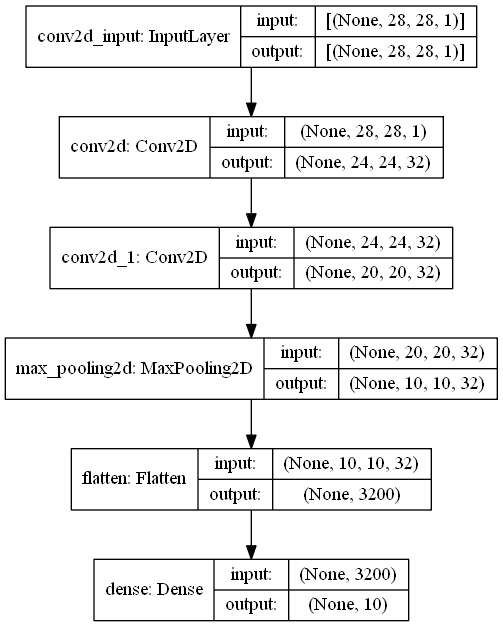

In [3]:
plot_model(model, show_shapes=True, show_layer_names=True)

# Functional API

In [9]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPool2D, concatenate

In [10]:
# input layer
input_data= Input(shape=(28, 28, 1))

In [21]:
# first feature extractor
# passing previous layer
conv1= Conv2D(32, kernel_size=5, activation='relu', name='1st_Conv2D_Layer')(input_data)
pool1= MaxPool2D(pool_size=(2,2), name='1st_MaxPool2D_Layer')(conv1)
flat1= Flatten(name='1st_Flatten1_Layer')(pool1)

In [22]:
# second feature extractor

conv2= Conv2D(16, kernel_size=7, activation='relu', name='2nd_Conv2D_Layer')(input_data)
pool2= MaxPool2D(pool_size=(2,2), name='2nd_MaxPool2D_Layer')(conv2)
flat2= Flatten(name='2nd_Flatten_Layer')(pool2)

In [24]:
# Merge feature extractor
merge= concatenate([flat1, flat2], name='merged_layer')

In [25]:
# interpretation layer
hidden1= Dense(10, activation='relu', name='hidden_layer')(merge)

In [26]:
# output layer
outputs= Dense(1, activation='sigmoid', name='output_layer')(hidden1)

In [27]:
# Model generation
model= Model(inputs= input_data, outputs= outputs)

In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
1st_Conv2D_Layer (Conv2D)       (None, 24, 24, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
2nd_Conv2D_Layer (Conv2D)       (None, 22, 22, 16)   800         input_1[0][0]                    
__________________________________________________________________________________________________
1st_MaxPool2D_Layer (MaxPooling (None, 12, 12, 32)   0           1st_Conv2D_Layer[0][0]           
____________________________________________________________________________________________

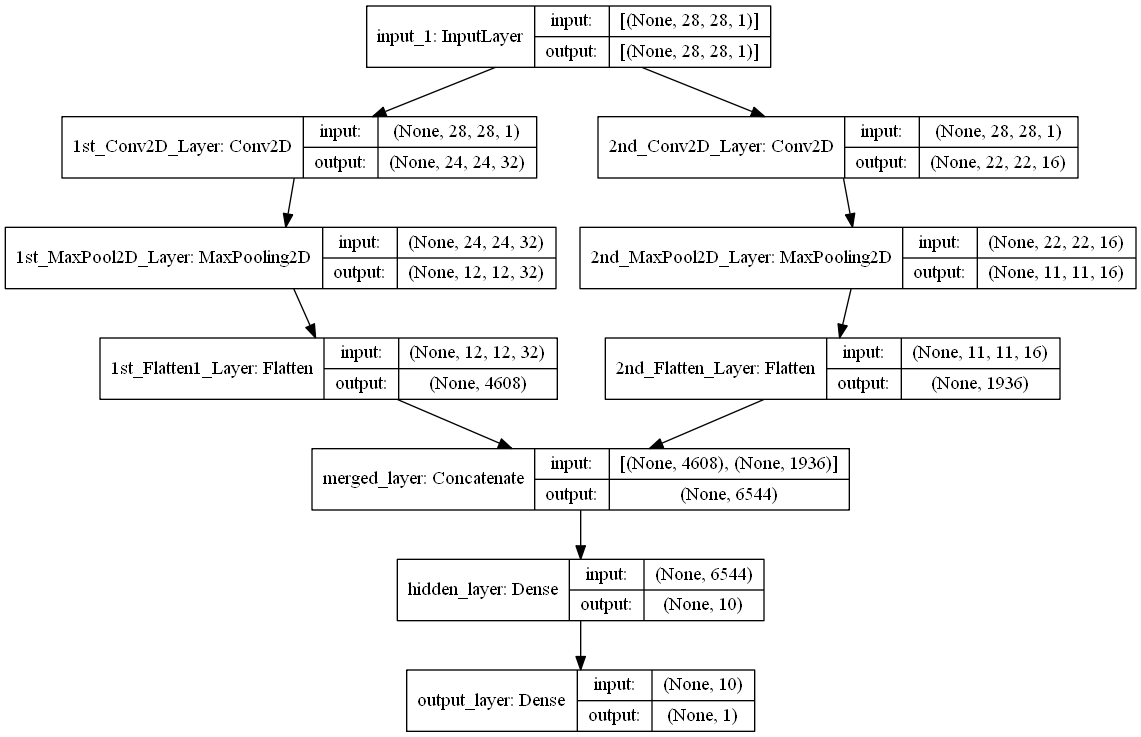

In [29]:
plot_model(model, show_shapes=True, show_layer_names=True)